In [5]:
import numpy as np

# Euclidean distance

In [1]:
# Function to compute Euclidean distance.
def euclidean(v1, v2):
    # Convert 1-D Python lists to numpy vectors
    v1 = np.array(v1)
    v2 = np.array(v2)
    
    # Compute vector which is the element wise square of the difference
    diff = np.power(np.array(v1) - np.array(v2), 2)
    
    # Perform summation of the elements of the above vector
    sigma_val = np.sum(diff)
    
    # Compute square root and return final Euclidean score
    euclid_score = np.sqrt(sigma_val)
    
    return euclid_score

In [2]:
# Define 3 users with ratings for 5 movies
u1 = [5, 1, 2, 4, 5]
u2 = [1, 5, 4, 2, 1]
u3 = [5, 2, 2, 4, 4]

In [6]:
euclidean(u1, u2)

7.483314773547883

In [7]:
euclidean(u1, u3) 

# Insight: The lower the Euclidean score (or distance), the more similar the two vectors are to each other

1.4142135623730951

In [8]:
alice = [1, 1, 3, 2, 4]
bob = [2, 2, 4, 3, 5]

euclidean(alice, bob)

2.23606797749979

In [9]:
eve = [5, 5, 3, 4, 2]

euclidean(eve, alice)

6.324555320336759

# Pearson correlation

In [10]:
from scipy.stats import pearsonr

pearsonr(alice, bob)

(1.0, 0.0)

In [11]:
pearsonr(alice, eve)

(-1.0, 0.0)

In [12]:
pearsonr(bob, eve)

(-1.0, 0.0)

# Cosine similarity

In [13]:
# The cosine similarity score computes the cosine of the angle between two vectors in an n-dimensional
# space. When the cosine score is 1 (or angle is 0), the vectors are exactly similar. On the other hand, a
# cosine score of -1 (or angle 180 degrees) denotes that the two vectors are exactly dissimilar to each other

# Clustering

## K-mean clustering

D:\Rezwanul-Haque\Installed_App\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Rezwanul-Haque\Installed_App\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


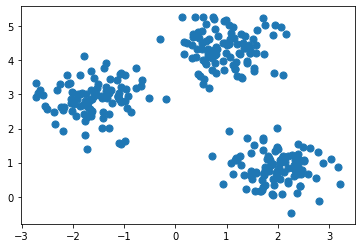

In [21]:
# Import the function that enables us to plot clusters
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs

# Get points such that they can form 3 visually separable clusters
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.50, random_state=0)

# plot the points on a scatterplot
plt.scatter(X[:, 0], X[:, 1], s=50)

In [11]:
y.size

300

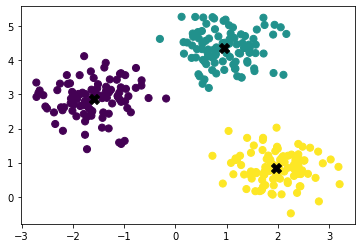

In [18]:
# Importing the k-means class
from sklearn.cluster import KMeans

# Initializer the K-Means object, set number of clusters to 3,
# centroid initialization as 'random' and maximum iterations to 10
kmeans = KMeans(n_clusters=3, init='random', max_iter=10)

# compute the k-means clustering
kmeans.fit(X)

# predict the classes for every point
y_pred = kmeans.predict(X)

# plot the data points again but with different colors for different classes
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50)

# Get the list of the final centroids
centroids = kmeans.cluster_centers_

# # plot the centroids onto the same scatterplot.
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker="X")

## Choosing the value of K

In [ ]:
## Elbow method of determining k

#### The Elbow method computes the sum of squares for each value of k and chooses the elbow point of the
# sum-of-squares v/s K plot as the best value for k. The elbow point is defined as the value of k at which
# the sum-of-squares value for every subsequent k starts decreasing much more slowly

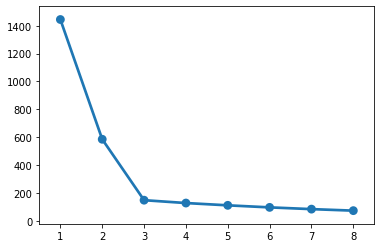

In [22]:
# List that will hold the sum of square values for different cluster sizes
ss = []

# we will compute SS for cluster sizes between 1 and 8.
for i in range(1, 9):
    # initialize the kmeans object and call the fit method to compute clusters
    kmeans = KMeans(n_clusters=i, random_state=0, max_iter=10, init='random').fit(X)
    
    # append the value of SS for a particular iteration into the ss list
    ss.append(kmeans.inertia_)

# plot the Elbow plot of SS v/s K
sns.pointplot(x=[j for j in range(1, 9)], y=ss)

In [23]:
# From the plot, it is clear that the Elbow is at K=3

# The k-means algorithm, although very powerful, is not ideal for every use case

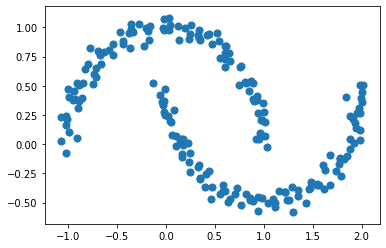

In [24]:
# CASE: 2
# import the half moon function from scikit-learn
from sklearn.datasets import make_moons

# Get access to points using the make_moons function
X_m, y_m = make_moons(200, noise=0.05, random_state=0)

# plot the two half moon clusters
plt.scatter(X_m[:, 0], X_m[:, 1], s=50)

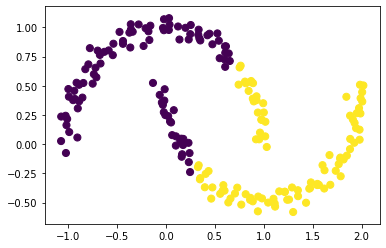

In [25]:
# Checking if K-means find the two half moons correctly.
# initialize K-means object with k=2 (for two half moons) and fit it to our data
kmm = KMeans(n_clusters=2, init='random', max_iter=10)
kmm.fit(X_m)

# predict the classes for the data points
y_m_pred = kmm.predict(X_m)

# plot the colored clusters as identified by K-means
plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m_pred, s=50)

In [26]:
# k-means algorithm doesn't do a very good job of identifying the correct clusters

D:\Rezwanul-Haque\Installed_App\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


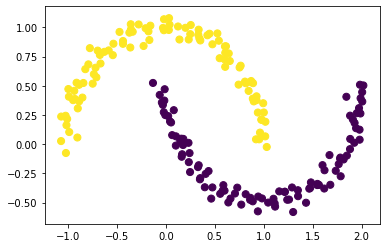

In [28]:
# clusters such as these half moons, another algorithm, called spectral clustering, with nearest-neighbor,
# affinity performs much better
# Import Spectral clustering from scikit-learn
from sklearn.cluster import SpectralClustering

# Define the Spectral Clustering Model
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')

# fit and predict the labels
y_m_sc = model.fit_predict(X_m)

# Plot the colored clusters as identified by Spectral Clustering
plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m_sc, s=50)

# Dimensionality reduction

### Most machine learning algorithms tend to perform poorly as the number of dimensions in the data
### increases. This phenomenon is often known as the curse of dimensionality
### There are two ways to achieve this
* Feature selection
* Feature extraction

### Principal component analysis (or PCA)

In [30]:
# Principal component analysis is an unsupervised feature extraction algorithm that takes in m-dimensional
# input to create a set of n (m >> n) linearly uncorrelated variables (called principal components) in such a
# way that the n dimensions lose as little variance (or information) as possible due to the loss of the (m-n)
# dimensions.

# PCA tries to identify the first principal component, which will hold the maximum possible variance. It does so by defining a new
# dimension using the two highly correlated variables. Now, it tries to define the next dimension in such a
# way that it holds the maximum variance, is orthogonal to the first principal component constructed, and
# also is uncorrelated to it

In [35]:
import pandas as pd
# Load the Iris dataset into Pandas DataFrame
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                  names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# display the head of the dataframe
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
# The PCA algorithm is extremely sensitive to scale. Therefore, we are going to scale all the features in
# such a way that they have a mean of 0 and a variance of 1

# import Standard scaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Separate the features and the class
x = iris.drop('class', axis=1)
y = iris['class']

# Scale the feature of x
X = pd.DataFrame(StandardScaler().fit_transform(x),
                columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [37]:
# Transform our data into the two-dimensional space
# import PCA
from sklearn.decomposition import PCA

# initialize a PCA object to transform into the 2D Space.
pca = PCA(n_components=2)

# Apply PCA
pca_iris = pca.fit_transform(X)
pca_iris = pd.DataFrame(data=pca_iris, columns=['PC1', 'PC2'])

pca_iris.head()


,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [38]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

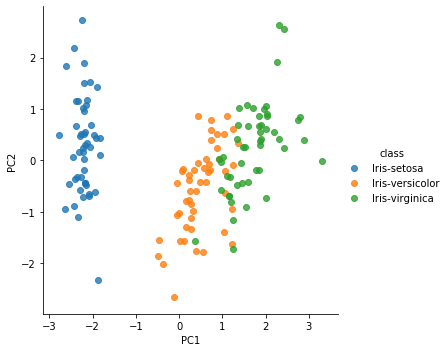

In [39]:
# Concatenate the class variable
pca_iris = pd.concat([pca_iris, y], axis=1)

# Display the scatterplot
sns.lmplot(x='PC1', y='PC2', data=pca_iris, hue='class', fit_reg=False)

# Other dimensionality reduction techniques

## Linear-discriminant analysis (LDA)

In [ ]:
# linear-discriminant analysis is a linear transformation method that aims to transform mdimensional 
# data into an n-dimensional output space

# LDA aims to identify a set of n features that result in the maximum separation 
# (or discrimination) of classes. Since LDA requires labeled data in order to 
# determine its components, it is a type of supervised learning algorithm.

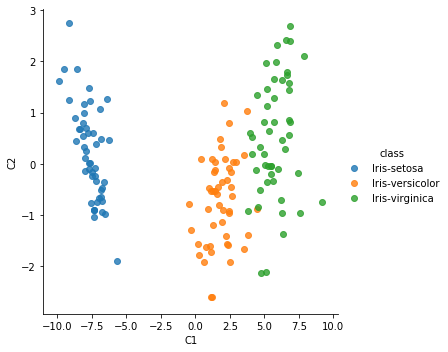

In [40]:
# import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define the LDA object to have two components
lda = LinearDiscriminantAnalysis(n_components=2)

# Apply LDA
lda_iris = lda.fit_transform(X, y)
lda_iris = pd.DataFrame(data=lda_iris, columns=['C1', 'C2'])

# Concatenate the class variable
lda_iris = pd.concat([lda_iris, y], axis=1)

# Display the scatterplot
sns.lmplot(x="C1", y="C2", data=lda_iris, hue="class", fit_reg=False)

## Singular value decomposition (SVD)

In [ ]:
# Singular value decomposition, or SVD, is a type of matrix analysis technique that allows us to 
# represent a high-dimensional matrix in a lower dimension. SVD achieves this by identifying and 
# removing the less important parts of the matrix and producing an approximation in the desired 
# number of dimensions

## Boosting algorithms

### Gradient Boosting

In [41]:
# Divide the dataset into training and test datasets
X, y = iris.drop('class', axis=1), iris['class']

# Split the data into training and test datasets
# train on 75% of the data and assess out performance on 25% of the remaining data

# import the train & test spliting function
from sklearn.model_selection import train_test_split

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Import the gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

# Apply gradient boosting to the training data
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# Compute the accuracy on the test set
gbc.score(X_test, y_test)

0.9736842105263158

In [43]:
gbc.feature_importances_

array([0.00358046, 0.02030067, 0.73907342, 0.23704546])

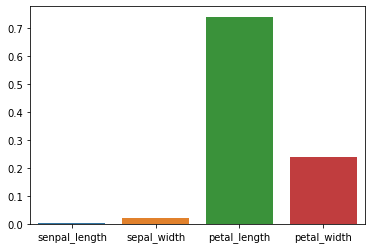

In [42]:
# Display a bar plot of the feature importance
sns.barplot(x=['senpal_length', 'sepal_width', 'petal_length', 'petal_width'], y=gbc.feature_importances_)

# Evaluation metrics

* Accuracy
* Root mean square error(RMSE)
* Binary classification metrics
* Precision
* Recall
* F1 Score